In [1]:
#First, we import Tropycal and its key components: "tracks", "tornado", and "recon"
from tropycal import tracks, tornado, recon, rain

#We then import "numpy" for mathematical calculations, and "datetime" for date and time functionality
import numpy as np
from datetime import datetime as dt,timedelta

#Code to ignore warning when reading in data 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import datetime  
import xarray as xr
import pandas 

In [3]:
atlantic_basin = tracks.TrackDataset('north_atlantic',include_btk=True)

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (5.19 seconds)
--> Starting to read in best track data
--> Completed reading in best track data (0.3 seconds)


In [4]:
print(atlantic_basin)

<tropycal.tracks.Dataset>
Dataset Summary:
    Basin:             north_atlantic
    Source:            hurdat
    Number of storms:  1915
    Maximum wind:      165 knots (Allen 1980)
    Minimum pressure:  882 hPa (Wilma 2005)
    Year range:        1851 — 2020


In [6]:
atlantic_basin.ace_climo(2019,compare_years=(2005,2016,2017,2018))

RuntimeError: No storms were identified for the given year in the given basin.

In [7]:
#We can also filter storms under different critera, like wind speed and minimum pressure
Intense_storms = atlantic_basin.filter_storms(thresh={'v_min':140}, doInterp = True)

#This will print out the storm IDs, not their names 
print("Intense Storms:", Intense_storms)

print('-------------------------------------------------------------')

Super_Intense_storms = atlantic_basin.filter_storms(thresh={'v_min':160}, doInterp = True)
print("Super Intense Storms", Super_Intense_storms)

KeyError: 'dvmax_dt'

In [ ]:
for Hurricane_name in Intense_storms:
    print(atlantic_basin.get_storm_tuple(Hurricane_name))

In [ ]:
for Hurricane_name1 in Super_Intense_storms:
    print(atlantic_basin.get_storm_tuple(Hurricane_name1))

In [ ]:
#In the index for tropycal, one can change the visual settings such as line/colors
#'Category' gives the Hurdat default color scale for the hurricane categories 
atlantic_basin.plot_storms(Super_Intense_storms, prop={'dots':True, 'linecolor': 'category', 'linewidth': 1 })

In [8]:
#Focusing in on 2005
Atlantic_2005 = atlantic_basin.get_season(2005)

print(Atlantic_2005)

<tropycal.tracks.Season>
Season Summary:
    Total Storms:      31
    Named Storms:      28
    Hurricanes:        15
    Major Hurricanes:  7
    Season ACE:        250.3

More Information:
    year:          2005
    basin:         north_atlantic
    source_basin:  north_atlantic
    source:        hurdat
    source_info:   NHC Hurricane Database


<GeoAxesSubplot:title={'left':'2005 Atlantic Hurricane Season','right':'28 named • 15 hurricanes • 7 major\n250.3 Cumulative ACE'}>

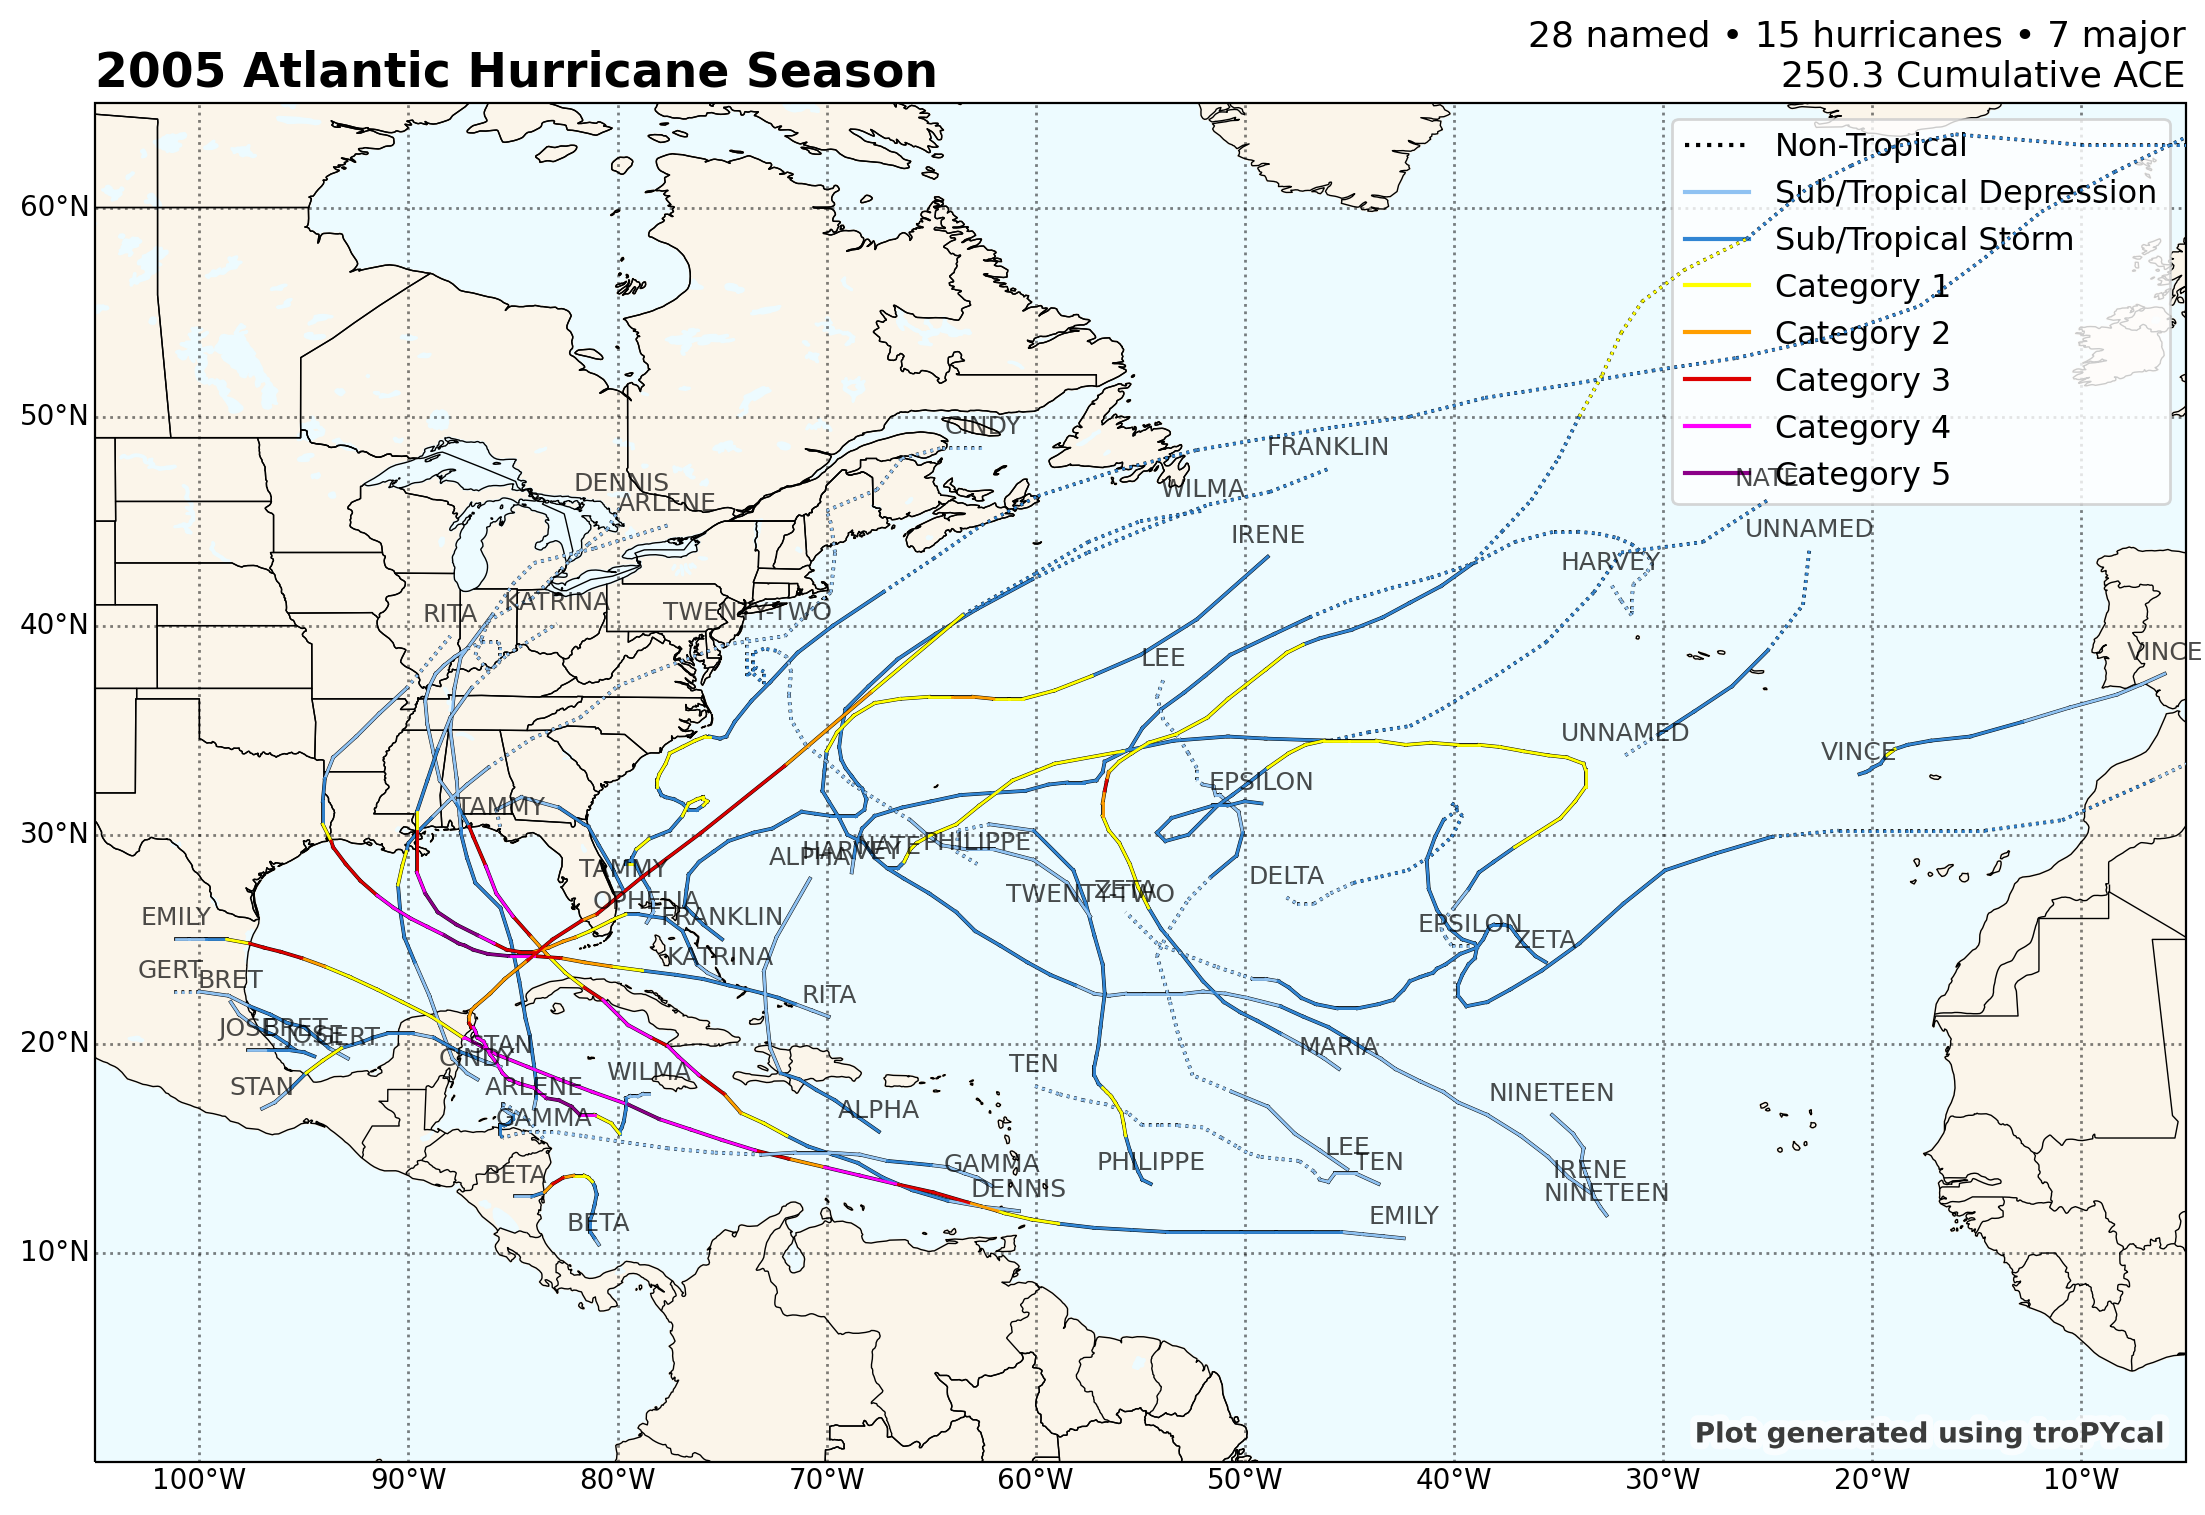

In [9]:
Atlantic_2005.plot()

In [10]:
#Looking more into Hurricane Wilma 
#This function gives a summary of a specific hurricane 
Hurricane_Wilma = atlantic_basin.get_storm(('Wilma', 2005))
print(Hurricane_Wilma)

<tropycal.tracks.Storm>
Storm Summary:
    Maximum Wind:      160 knots
    Minimum Pressure:  882 hPa
    Start Date:        1800 UTC 15 October 2005
    End Date:          1800 UTC 25 October 2005

Variables:
    date        (datetime) [2005-10-15 18:00:00 .... 2005-10-26 18:00:00]
    extra_obs   (int32) [0 .... 0]
    special     (str) [ .... ]
    type        (str) [TD .... EX]
    lat         (float64) [17.6 .... 45.5]
    lon         (float64) [-78.5 .... -52.0]
    vmax        (int32) [25 .... 40]
    mslp        (int32) [1004 .... 990]
    wmo_basin   (str) [north_atlantic .... north_atlantic]

More Information:
    id:              AL252005
    operational_id:  AL242005
    name:            WILMA
    year:            2005
    season:          2005
    basin:           north_atlantic
    source_info:     NHC Hurricane Database
    source:          hurdat
    ace:             38.9
    realtime:        False
    invest:          False


In [11]:
Atlantic_2005.to_dataframe()

,id,name,vmax,mslp,category,ace,start_time,end_time,start_lat,start_lon
0,AL012005,ARLENE,60,989,0,2.6,2005-06-08 18:00:00,2005-06-13 06:00:00,16.9,-84.0
1,AL022005,BRET,35,1002,0,0.4,2005-06-28 18:00:00,2005-06-30 00:00:00,19.7,-95.4
2,AL032005,CINDY,65,991,1,1.5,2005-07-03 18:00:00,2005-07-07 06:00:00,18.3,-86.7
3,AL042005,DENNIS,130,930,4,18.8,2005-07-04 18:00:00,2005-07-13 06:00:00,12.0,-60.8
4,AL052005,EMILY,140,929,5,32.9,2005-07-11 00:00:00,2005-07-21 12:00:00,10.7,-42.4
5,AL062005,FRANKLIN,60,997,0,6.7,2005-07-21 18:00:00,2005-07-29 18:00:00,25.0,-75.0
6,AL072005,GERT,40,1005,0,0.5,2005-07-23 18:00:00,2005-07-25 12:00:00,19.3,-92.9
7,AL082005,HARVEY,55,994,0,5.4,2005-08-02 18:00:00,2005-08-08 18:00:00,28.2,-68.8
8,AL092005,IRENE,90,970,2,13.1,2005-08-04 18:00:00,2005-08-18 12:00:00,12.9,-33.5
9,AL102005,TEN,30,1008,-1,0.0,2005-08-13 12:00:00,2005-08-14 12:00:00,13.3,-43.6


In [12]:
#Gives the 6-hour data values for lat/lon, wind speed, and pressure 
Hurricane_Wilma.to_dataframe()

,date,extra_obs,special,type,lat,lon,vmax,mslp,wmo_basin
0,2005-10-15 18:00:00,0,,TD,17.6,-78.5,25,1004,north_atlantic
1,2005-10-16 00:00:00,0,,TD,17.6,-78.8,25,1004,north_atlantic
2,2005-10-16 06:00:00,0,,TD,17.5,-79.0,30,1003,north_atlantic
3,2005-10-16 12:00:00,0,,TD,17.5,-79.2,30,1003,north_atlantic
4,2005-10-16 18:00:00,0,,TD,17.5,-79.4,30,1002,north_atlantic
5,2005-10-17 00:00:00,0,,TD,17.4,-79.6,30,1001,north_atlantic
6,2005-10-17 06:00:00,0,,TS,16.9,-79.6,35,1000,north_atlantic
7,2005-10-17 12:00:00,0,,TS,16.3,-79.7,40,999,north_atlantic
8,2005-10-17 18:00:00,0,,TS,16.0,-79.8,45,997,north_atlantic
9,2005-10-18 00:00:00,0,,TS,15.8,-79.9,55,988,north_atlantic


In [18]:
df = Hurricane_Wilma.to_dataframe()
df['date'][0]

Timestamp('2005-10-15 18:00:00')

In [ ]:
#Plots the entire lifespan of a hurricane... plot_all_dots=True makes it so the data points are not spread out every six hours, but rather displays 
#all of the available data points
Hurricane_Wilma.plot(plot_all_dots=True)

In [ ]:
#Plots the NHC cone at a specific time 
#Could there be a way to loop it to see how the forecast cone changes over the duration of the storm's lifetime?
Hurricane_Wilma.plot_nhc_forecast(dt(2005,10,23,12))

In [ ]:
Hurricane_Wilma.plot_tors(dist_thresh = 1000, plotPPH = 'daily', plot_all = True)

In [ ]:
Rain = rain.RainDataset()

In [ ]:
Wilma_Rain = Rain.get_storm_rainfall(Hurricane_Wilma)

In [ ]:
Wilma_Rain

In [ ]:
Interpolated_rain_Wilma = Rain.interpolate_to_grid(Hurricane_Wilma, return_xarray = True)

Levels = [0.25, 0.5, 1, 2, 4, 8, 12, 16]

#Plots interpolated rain data for Wilma 
Rain.plot_rain_grid(Hurricane_Wilma, Interpolated_rain_Wilma, Levels)

In [ ]:
Rain.plot_rain(Hurricane_Wilma, levels = Levels, domain = {'s': 24, 'n': 30, 'w': -84, 'e': -79})

In [ ]:
#Looking at another rainfall example...
TS_Imelda = atlantic_basin.get_storm(('Imelda', 2019))

In [ ]:
Interpolated_rain_Imelda = Rain.interpolate_to_grid(TS_Imelda, return_xarray = True)

Levels1 = [1,2,4,8,12,16,20,24,28,32,36,40]

#Plots interpolated rain data for Wilma 
Rain.plot_rain_grid(TS_Imelda, Interpolated_rain_Imelda, Levels1)

In [ ]:
Rain.plot_rain(TS_Imelda, levels = Levels1, domain = {'s': 28, 'n': 32, 'w': -96, 'e': -93})

In [ ]:
mycmap = {-100:'firebrick',-50:'violet',-20:'royalblue',-.001:'cyan',0:'gold',10:'gold'}
atlantic_basin.gridded_stats('Minimum pressure change in 24 hours',binsize=2.5,year_range=(1851,2019),prop={'plot_values':True,'cmap':mycmap,'levels':(-100,10)})

In [ ]:
# URL to remotely access

# NASA THREDDS data server (TDS) URLs
#URL = 'https://goldsmr4.gesdisc.eosdis.nasa.gov/thredds/dodsC/MERRA2_MONTHLY_aggregation/M2TMNXAER.5.12.4_Aggregation.ncml' # aerosol
#URL = 'https://gpm1.gesdisc.eosdis.nasa.gov/thredds/dodsC/aggregation/GPM_3IMERGM.06/GPM_3IMERGM.06_Aggregation.ncml.ncml' # GPM monthly

# NASA GDS data server (GDS) URLs
# https://gpm1.gesdisc.eosdis.nasa.gov/dods/

URLd= 'https://gpm1.gesdisc.eosdis.nasa.gov/dods/GPM_3IMERGDF_06' # GPM daily accumulated final on GDS server
URLm= 'https://gpm1.gesdisc.eosdis.nasa.gov/dods/GPM_3IMERGM_06'  # monthly accumulated
URLh= 'https://gpm1.gesdisc.eosdis.nasa.gov/dods/GPM_3IMERGHH_06' # half-hourly instantaneous

# Read the data: daily as a test
ds = xr.open_dataset(URLd)
ds

In [ ]:
specialat = 20
specialon = -80
specialtime = datetime.datetime(2005,10,19)
radius = 5 # degrees, ignoring cos(lat) factor in dx=dlon*cos(lat)

# Subset dataset to bounding box: 
dsbox = ds.sel(lat=slice(specialat-radius,specialat+radius),
               lon=slice(specialon-radius,specialon+radius),
               time=specialtime); dsbox

In [ ]:
dsbox.to_netcdf(r"C:\Users\pecok\Box\MapesGroupUndergradResearch\Kyle\test.nc")

In [ ]:
#datetime.datetime(2005, 10, 19)

In [ ]:
#datetime.datetime?